* We would like to test whether the whole weight of the snail is on average different between male and female snails.
* Does this data meet the assumptions to answer such a question statistically?
* What are the formal hypotheses?
* Conduct the hypothesis test. What is the p-value? What can you say given the p-value and significance level?

In [1]:
%reload_ext nb_black
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [6]:
snails = pd.read_csv("abalone_csv.csv")
snails.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


<IPython.core.display.Javascript object>

In [8]:
m_snail = snails[snails["Sex"] == "M"]
f_snail = snails[snails["Sex"] == "F"]

<IPython.core.display.Javascript object>

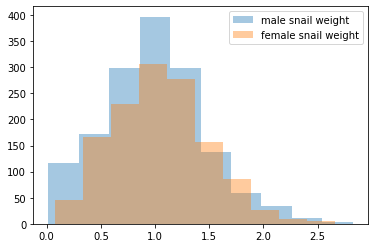

<IPython.core.display.Javascript object>

In [9]:
plt.hist(m_snail["Whole_weight"], alpha=0.4, label="male snail weight")
plt.hist(f_snail["Whole_weight"], alpha=0.4, label="female snail weight")
plt.legend(loc="upper right")
plt.show()

In [10]:
print(stats.describe(m_snail["Whole_weight"]))
print(stats.describe(f_snail["Whole_weight"]))
#Both have relatively low skewness and kurtosis, so both are fairly normal.

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


<IPython.core.display.Javascript object>

Null hypothesis is that there is no difference between the two means.

Alternative hypothesis is that there is a difference between the two means.

We need to find t and p values in order to accept or reject this null hypothesis.

In [15]:
t, p = stats.ttest_ind(m_snail["Whole_weight"], f_snail["Whole_weight"])
print("t: " + str(t))
print("p: " + str(p))

t: -3.230536346547456
p: 0.0012497207919589404


<IPython.core.display.Javascript object>

This implies that there is a .12% chance that there will be a difference in means of this size (-3.23).

In this case we reject are null hypothesis, and can say that there is a statistical difference between the weights of male and female snails. 

Could also be said that: "there is a 99.88% chance that the difference observed reflects a real difference between populations an a .12% chance thats the difference is due to chance."

[[Text(0, 0, 'male weight'), Text(1, 0, 'female_weight')]]

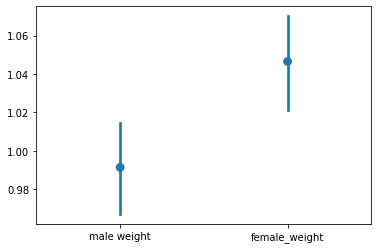

<IPython.core.display.Javascript object>

In [19]:
pp = sns.pointplot(data=[m_snail["Whole_weight"], f_snail["Whole_weight"]], join=False)
pp.set(xticklabels=["male weight", "female_weight"])